In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate

from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier





In [11]:
from google.colab import files
uploaded = files.upload()

Saving Melbourne_housing_FULL.csv to Melbourne_housing_FULL (1).csv


In [12]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [13]:
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [15]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [17]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [18]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [19]:
df_copy.duplicated().sum()

1

In [20]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [21]:
df_copy.drop_duplicates(inplace= True)

In [22]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34856, 21)
Size      : 731976
Dimension : 2


In [23]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.031013e+00,0.969947,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34855.0,1.118481e+01,6.788952,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34855.0,3.116062e+03,109.025437,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26639.0,3.084650e+00,0.980708,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26630.0,1.624747e+00,0.724177,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26128.0,1.728835e+00,1.010789,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23046.0,5.936072e+02,3398.915462,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13741.0,1.602516e+02,401.281270,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15550.0,1.965288e+03,37.328340,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [24]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [25]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [26]:
categorical_columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
numerical_columns = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude','Longtitude', 'Propertycount']

In [27]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34856, 21)
Size      : 731976
Dimension : 2


<Axes: >

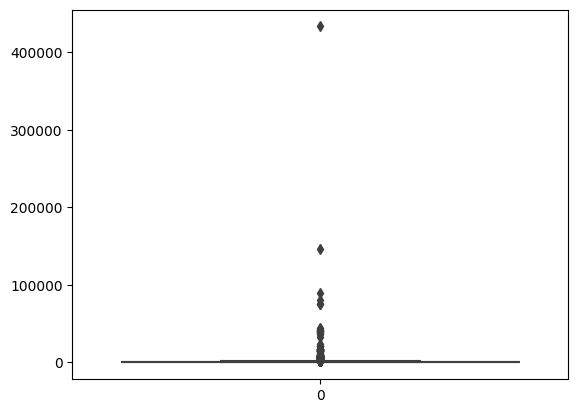

In [28]:
import seaborn as sns
sns.boxplot(df['Landsize']) #just in case

In [29]:
print(np.where(df['Landsize']> 1250)) #just in case

(array([   12,    41,   388,   392,   426,   448,   453,   569,   616,
         772,   858,   943,   975,   989,  1009,  1059,  1127,  1198,
        1727,  1793,  1873,  2016,  2185,  2274,  2280,  2287,  2313,
        2388,  2586,  2725,  2774,  2855,  2868,  3068,  3533,  3539,
        3542,  3544,  3553,  3729,  3737,  3781,  3829,  3831,  3832,
        3884,  3892,  3895,  3948,  4028,  4143,  4149,  4175,  4232,
        4251,  4256,  4258,  4270,  4315,  4334,  4389,  4415,  4446,
        4464,  4517,  4538,  4661,  4721,  4724,  4833,  4838,  5005,
        5046,  5101,  5195,  5220,  5230,  5283,  5306,  5318,  5325,
        5339,  5547,  5682,  5794,  5797,  5798,  5801,  5848,  5882,
        5933,  5937,  5993,  6009,  6139,  6154,  6181,  6195,  6430,
        6535,  6554,  6567,  6572,  6573,  6591,  6595,  6596,  6624,
        6646,  6694,  6718,  6745,  6780,  6792,  6794,  6816,  6872,
        6921,  6981,  7007,  7043,  7232,  7256,  7292,  7293,  7451,
        7593,  7606

In [30]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Landsize']))
print(z) #just in case

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
34852   NaN
34853   NaN
34854   NaN
34855   NaN
34856   NaN
Name: Landsize, Length: 34857, dtype: float64


In [31]:
print("Mean value of Landsize",df['Landsize'].mean())
print("Standard deviation of Landsize",df['Landsize'].std())
print("Minimum value of Landsize",df['Landsize'].min())
print("Maximum value of Landsize",df['Landsize'].max())

Mean value of Landsize 593.598993361392
Standard deviation of Landsize 3398.8419464599097
Minimum value of Landsize 0.0
Maximum value of Landsize 433014.0


In [32]:
threshold = 3000
outlier = []
for i in df['Landsize']:
  z = (i-df['Landsize'].mean()/df['Landsize'].std())
  if z > threshold:
    outlier.append(i)
print(outlier)


[4292.0, 4290.0, 75100.0, 4931.0, 4676.0, 4668.0, 4676.0, 15900.0, 3701.0, 10100.0, 4332.0, 4296.0, 4296.0, 4296.0, 8680.0, 4727.0, 3056.0, 3414.0, 3132.0, 3194.0, 3977.0, 4267.0, 4440.0, 3448.0, 3957.0, 3064.0, 15100.0, 5661.0, 3217.0, 3967.0, 37000.0, 4977.0, 3014.0, 3014.0, 4230.0, 4051.0, 4640.0, 21700.0, 5865.0, 14545.0, 6866.0, 5042.0, 4655.0, 4655.0, 8216.0, 3037.0, 4679.0, 41400.0, 8223.0, 7455.0, 8223.0, 3516.0, 14500.0, 17200.0, 17200.0, 14500.0, 6111.0, 17200.0, 3878.0, 3878.0, 3879.0, 8888.0, 5530.0, 6186.0, 7170.0, 7458.0, 7330.0, 7746.0, 4781.0, 3348.0, 3455.0, 3084.0, 4497.0, 4497.0, 4497.0, 5289.0, 5289.0, 16000.0, 3886.0, 3747.0, 15900.0, 4296.0, 6494.0, 4721.0, 5325.0, 3705.0, 7159.0, 21715.0, 8220.0, 3512.0, 7455.0, 3512.0, 5467.0, 3434.0, 17200.0, 3197.0, 4076.0, 6261.0, 4657.0, 8140.0, 5022.0, 3617.0, 9838.0, 3826.0, 3217.0, 4563.0, 13733.0, 3701.0, 4096.0, 4606.0, 37000.0, 6830.0, 3093.0, 4413.0, 4401.0, 6996.0, 3160.0, 4700.0, 8888.0, 3878.0, 3481.0, 4780.0, 4221

In [33]:
len(outlier)

229

In [34]:
new_df = df[(df['Landsize']  < 3000)]
new_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [35]:
new_df.shape

(22818, 21)

In [36]:
df = new_df

In [37]:
df.shape

(22818, 21)

<Axes: >

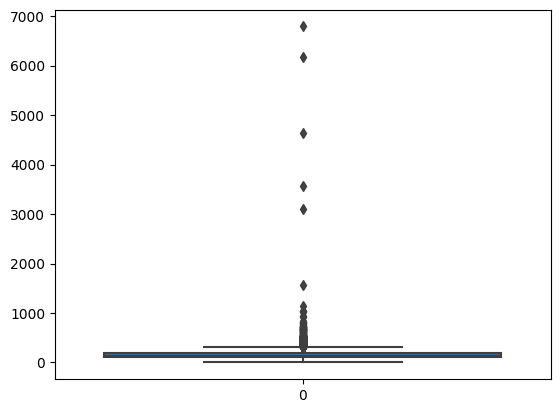

In [38]:
import seaborn as sns
sns.boxplot(df['BuildingArea'])

In [39]:
import numpy as np
print(np.where(df['BuildingArea'] > 133))

(array([    4,     6,     7, ..., 22807, 22811, 22812]),)


In [40]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['BuildingArea']))
print(z)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
34851   NaN
34852   NaN
34853   NaN
34854   NaN
34856   NaN
Name: BuildingArea, Length: 22818, dtype: float64


In [41]:
print("Mean value of BuildingArea",df['BuildingArea'].mean())
print("Standard deviation of BuildingArea",df['BuildingArea'].std())
print("Minimum value of BuildingArea",df['BuildingArea'].min())
print("Maximum value of BuildingArea",df['BuildingArea'].max())

Mean value of BuildingArea 156.12225105516782
Standard deviation of BuildingArea 133.3579538669487
Minimum value of BuildingArea 0.0
Maximum value of BuildingArea 6791.0


In [42]:
threshold2 = 133
outlier2 = []
for i2 in df['BuildingArea']:
  z2 = (i2-df['BuildingArea'].mean()/df['BuildingArea'].std())
  if z2 > threshold2:
    outlier2.append(i2)
print(outlier2)

[150.0, 142.0, 220.0, 210.0, 147.0, 190.0, 135.0, 167.0, 135.0, 174.0, 225.0, 145.0, 145.0, 186.0, 174.0, 309.0, 192.0, 146.0, 198.0, 145.0, 180.0, 159.0, 181.0, 147.0, 146.0, 254.0, 207.0, 145.0, 185.0, 263.0, 203.0, 165.0, 140.0, 271.0, 272.0, 211.0, 210.0, 242.0, 268.0, 220.0, 152.0, 176.0, 141.0, 136.0, 251.0, 167.0, 169.0, 196.0, 603.0, 170.0, 157.0, 160.0, 158.0, 168.0, 150.0, 165.0, 176.0, 158.0, 292.0, 208.0, 204.0, 143.0, 222.0, 203.0, 146.0, 182.0, 163.0, 516.0, 232.0, 135.0, 180.0, 149.0, 251.0, 333.0, 285.0, 155.0, 135.0, 174.0, 270.0, 435.0, 168.0, 148.0, 185.0, 170.0, 177.0, 147.0, 139.0, 232.0, 195.0, 204.0, 286.0, 149.0, 180.0, 160.0, 411.0, 158.0, 402.0, 157.0, 147.0, 148.0, 155.0, 168.0, 172.0, 177.0, 144.0, 166.0, 175.0, 273.0, 399.0, 220.0, 315.0, 149.0, 178.0, 618.0, 145.0, 163.0, 152.0, 160.0, 180.0, 228.0, 145.0, 398.0, 444.0, 142.0, 390.0, 180.0, 139.0, 206.0, 197.0, 168.0, 199.0, 266.0, 274.0, 240.0, 278.0, 164.0, 201.0, 302.0, 203.0, 792.0, 152.0, 215.0, 151.0

In [43]:
len(outlier2)

6069

In [44]:
new_df2 = df[(df['BuildingArea']  < 133)]
new_df2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.80100,144.99890,Northern Metropolitan,4019.0
20,Abbotsford,2 Rich St,2,h,NaN,SP,Biggin,10/12/2016,2.5,3067.0,...,1.0,1.0,176.0,80.0,1925.0,Yarra City Council,-37.79980,144.99720,Northern Metropolitan,4019.0
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,94.0,2009.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34828,West Footscray,30 Gwelo St,3,h,900000.0,PI,Village,24/02/2018,6.4,3012.0,...,1.0,2.0,460.0,112.0,1940.0,Maribyrnong City Council,-37.80139,144.86458,Western Metropolitan,5058.0
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,...,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [45]:
new_df2.shape

(5811, 21)

In [46]:
print("Upper limit",df['Landsize'].mean() + 3*df['Landsize'].std())
print("Lower limit",df['Landsize'].mean() - 3*df['Landsize'].std())

Upper limit 1491.0570084866147
Lower limit -532.9959163663586


In [47]:
df[(df['Landsize'] < 10790) | (df['Landsize'] > -9602)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [48]:
new_df = df[(df['Landsize']  > -9602)]
new_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [49]:
df.shape

(22818, 21)

In [50]:
for column in ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [51]:
df['SellerG'] #control

0         Jellis
1         Biggin
2         Biggin
3         Rounds
4         Biggin
          ...   
34851        Jas
34852        Jas
34853    Sweeney
34854        Jas
34856         RW
Name: SellerG, Length: 22818, dtype: object

In [52]:
for column in ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude','Longtitude', 'Propertycount']:
    df[column].fillna(int(df[column].mean()), inplace=True)

In [53]:
df['Price'] #control

0        1097414.0
1        1480000.0
2        1035000.0
3        1097414.0
4        1465000.0
           ...    
34851    1101000.0
34852    1480000.0
34853     888000.0
34854     705000.0
34856    1020000.0
Name: Price, Length: 22818, dtype: float64

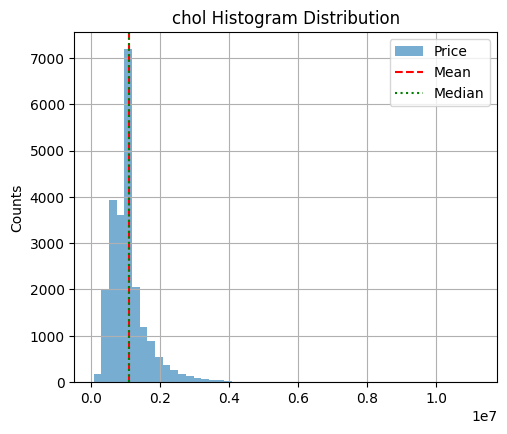

In [54]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df['Price'].hist(bins=50, label='Price', alpha=0.6)
plt.axvline(np.mean(df['Price']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Price']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("chol Histogram Distribution");
plt.legend()

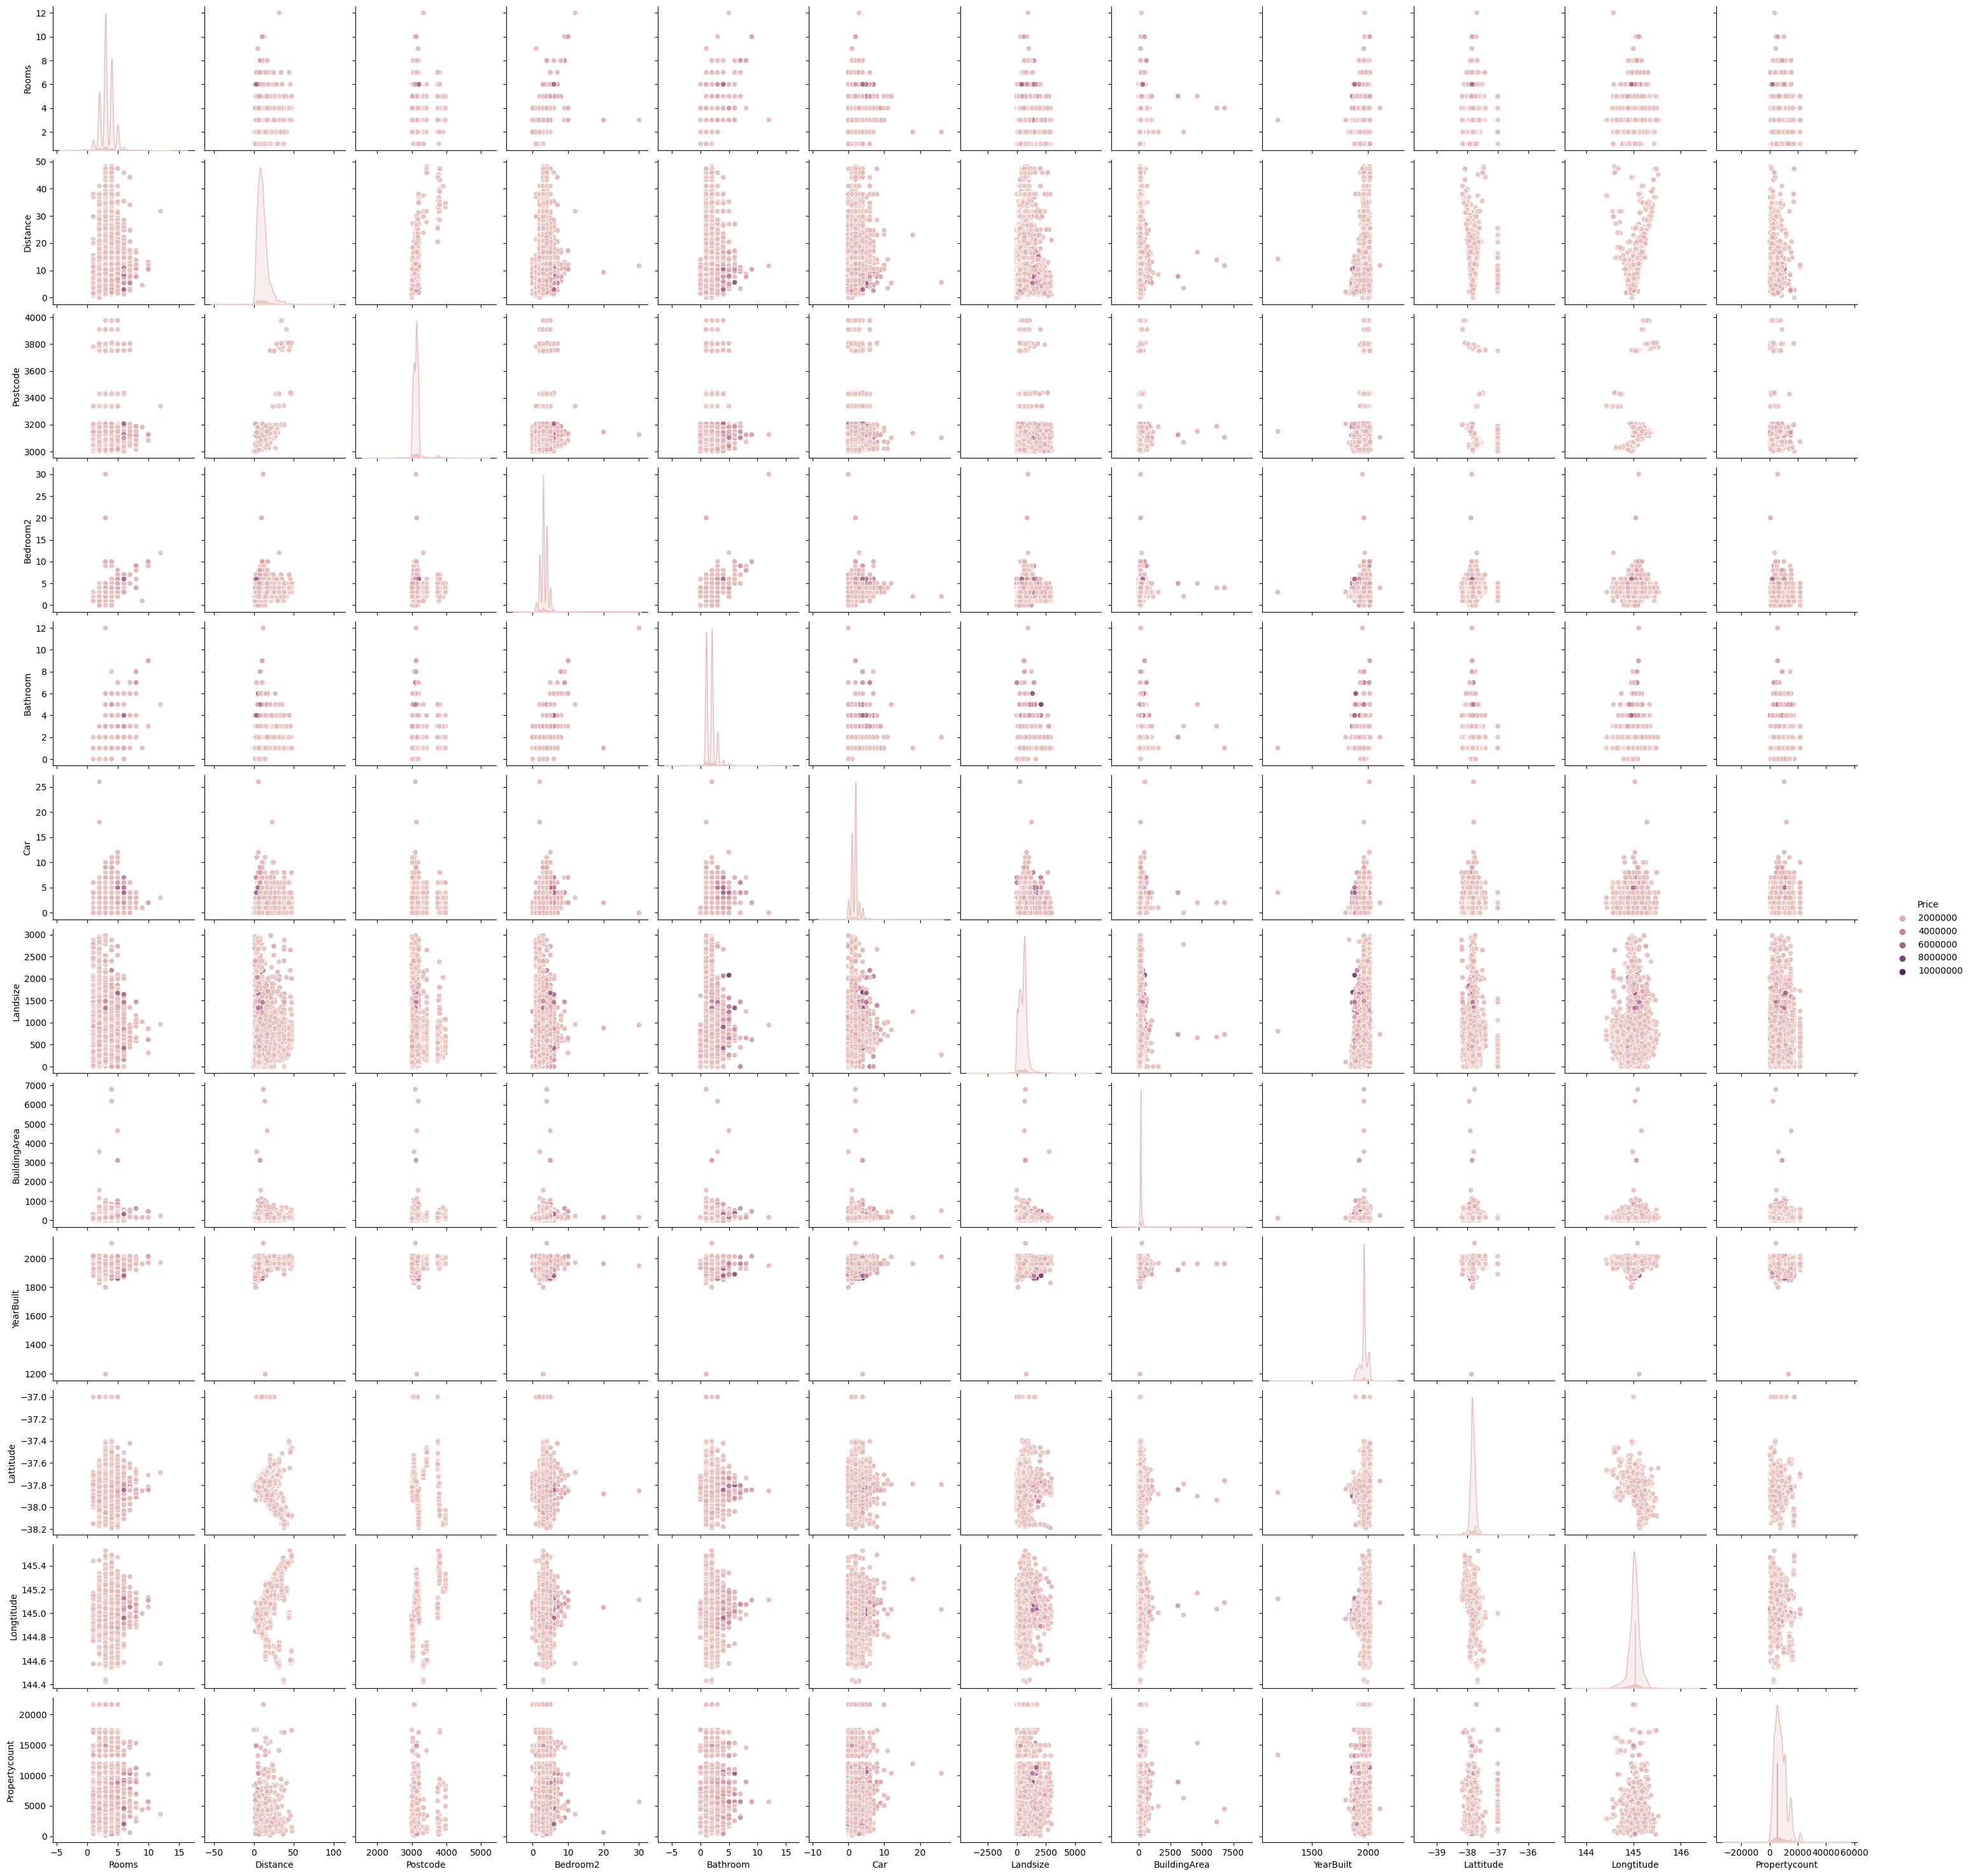

In [55]:
import seaborn
seaborn.pairplot(df[numerical_columns], hue ='Price')
plt.show()

<ipython-input-56-4e9bb4f9ff2d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr())


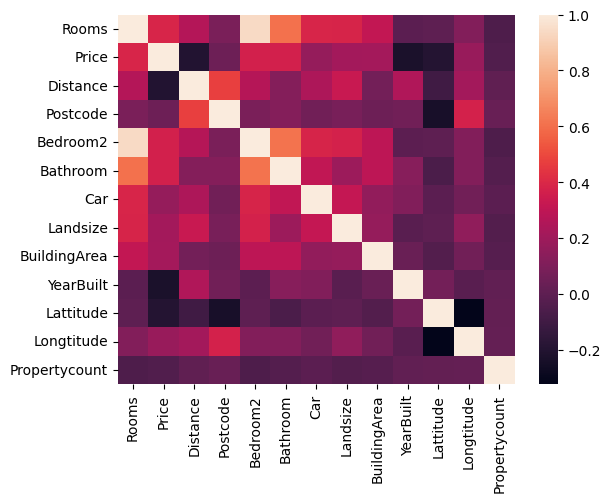

In [56]:
import matplotlib.pyplot as mp
import seaborn as sb
dataplot = sb.heatmap(df.corr())
mp.show()

In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(categorical_columns)
encoded_data = label_encoder.transform(categorical_columns)
original_data = label_encoder.inverse_transform(encoded_data)
print(encoded_data)

[6 0 7 3 5 2 1 4]


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(categorical_columns)
list(categorical_columns)
le.transform(categorical_columns)


array([6, 0, 7, 3, 5, 2, 1, 4])

In [59]:
df = pd.get_dummies(df, columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'])
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1097414.0,2.5,3067.0,2.0,1.0,1.0,126.0,156.0,1963.0,...,1,0,0,0,1,0,0,0,0,0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,156.0,1963.0,...,1,0,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,1,0,0,0,1,0,0,0,0,0
3,3,1097414.0,2.5,3067.0,3.0,2.0,1.0,0.0,156.0,1963.0,...,1,0,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,3,1101000.0,6.3,3013.0,3.0,1.0,1.0,288.0,156.0,1963.0,...,0,0,0,0,0,0,0,0,1,0
34852,4,1480000.0,6.3,3013.0,4.0,1.0,3.0,593.0,156.0,1963.0,...,0,0,0,0,0,0,0,0,1,0
34853,2,888000.0,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,...,0,0,0,0,0,0,0,0,1,0
34854,2,705000.0,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

models = {
'Lasso': {
'model': Lasso()
},
'LinearRegression': {
'model': LinearRegression()
},
'Ridge': {
'model': Ridge()
},
'ElasticNet': {
'model': ElasticNet()
},
'KNeighborsRegressor': {
'model': KNeighborsRegressor()
},
'RandomForestRegressor': {
'model': RandomForestRegressor()
},
'GradientBoostingRegressor': {
'model': GradientBoostingRegressor()
},
'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
},}


In [61]:
from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 25)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for name, model_info in models.items():
    model = model_info['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)



    print(f"isim:{name}\nmae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}")
